## import packages

In [1]:
import numpy as np 
seed= 42
np.random.seed( seed )


import pandas as pd 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)

# utility
import os
import sys
from pprint import pprint
from IPython.display import display
import gc
from tqdm import tqdm
from collections import Counter
import typing

# visualizations
import matplotlib.pyplot as plt

# NLP
import gensim

# modelling and data
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.utils import class_weight

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

import xgboost as xgb

## NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, LSTM, Embedding
from tensorflow.keras.utils import plot_model
from tensorflow.keras import utils
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

# multiprocessing
from multiprocessing import Pool

In [2]:
path= os.path.join('/kaggle', 'input', 'obfuscated_text', 'xtrain_obfuscated.txt')
xtrain= pd.read_csv(path, header= None)
xtrain.columns= ['text']

path= os.path.join('/kaggle', 'input', 'obfuscated_text', 'xtest_obfuscated.txt')
xtest= pd.read_csv(path, header= None)
xtest.columns= ['text']

path= os.path.join('/kaggle', 'input', 'obfuscated_text', 'ytrain.txt')
ytrain= pd.read_csv(path, header= None)
ytrain.columns= ['label']

data= pd.concat([xtrain, ytrain], axis= 1)
data= pd.concat([data, xtest], axis= 0)
print(data.shape)



(35513, 2)


,text,label,length
0,satwamuluhqgulamlrmvezuhqvkrpmletwulcitwskuhlemvtwamuluhiwiwenuhlrvimvqvkruhulenamuluhqgqvtwvimviwuhtwamuluhulqvkrenamcitwuhvipmpmqvuhskiwkrpmdfuhlrvimvskvikrpmqvuhskmvgzenleuhqvmvamuluhulenamuluhqvletwtwvipmpmgzleenamuhtwamuluhtwletwdfuhiwkrxeleentwxeuhpmqvuhtwiwmvamdfuhpkeztwamuluhvimvuhqvtwmkpmpmlelruhgztwtwskuhtwlrkrpmlruhpmuluhqvenuhtwyplepmxeuhenuhamypkrqvuhamulmvdfuhqvskentwamletwlrlrpmiwuhtwamul,7.0,406
1,twmkiwpmqvtwleuhsaiwsktwmvlelekramuhqvkruhtwskenezuhskvienuhqgulvienulqvvimvuhvienuhvimvuhulyptwbrtvkrqvuhtwamuluhsktwlrvienamypuhqvmvamguuhvgoaulamlrmvvibhpmuluhqvijulmvnkuhqgskkrpmiwenuhsktwskskenuhsaiwmvleenulvikriwpmmkvimvuhiguhvgqgulleentwamuhsaezuhqvqvtwiwtvuhskvisknkuhravidfpmvitwleuhvienmvypqvpmjeuhxepmuhlekrtwulenezenuhiwenmvypvimvmkpmlegzuhsktwulenletvtwiwtwypuhtwamuluhpmul,3.0,386
2,vidfpmskuhvilepmuluhtwtvuhulsovienamqvuhskiwmvamypuhtwamulsouhqgvienezuhtwamuluhamulmvdfuhsaiwulvitwiwpmmvmkuhlrvimviwlrlrkrleulqvuhqgiwlemvlruhtwamuluhsktwezentwleypqvuhsoqgulenamuluhlepmxeuhtwleenypuhulsovipmskuhiguhqgiwiwmvdfuhqgulenamuluhlepmxeuhtwleenypuhulsovipmskuhigsouhulqvvimvenlrenuhskentwamuhlekrpmsauhulmviwgzqvuhiwiwsoiguhlepmuhqgtwezuhezpmlexeuhxexepmuhskvienulxysouhuhragzqvenlelruhqvsoiwlemvlruhtwamul,8.0,418
3,raskleenkrlruhtwulenleengztwqvuhenuhsatvuhsktwskvikrpmlelekrqvuhsktwuciwendfuhamypentwuhskvienuhqgulleengzenuhulgztwucuhtwletwdfuhpmdfuluhtwamguuhralrvimvezpmypuhtwleenuhkrpmsauhdfpmviucuhsatwamulnkuhpkulypmvmkvipmypuhsaezuhpmuluhulvientwlrletwqvuhtwamuluhskmvenqvuhvgqgskleenpmtvuhvipmuhsktwulyptwgzcitwuhtwleenuhkrpmrbnkuhraleentwuhsaezuhtwskmvqvvimvuhlrvimvamultwezpmqvuhulqvlekrtvuhpmuluhsktweztwtwqvuhulenamuluhskvikrpmqv,3.0,426
4,dfenqvuhtwamqvuhqgtwiwtvenuluhqvijletwamulenxeuhletwamuhleentwviuhvidfpmskuhulenqvuhtwamqvuhvitwamdfuhskvienuhpkvidfpmultwucpmeeuhqvskleendfpmuluhsktwucpmpmiwuhdfpmskvimvdfuhskuhuhralrvimvvilepmezuhsktwulvimvpmgzgzenuhtwamuluhvipmuhsktwlemvengztwleuhenqvmvkrpmxzuhpkskmviwbhvimvxexepmypuhenuhvipmgzkruhgzenleuhenuhtwucmviwuhulentwtvuhenuhamulmvdfuhskvipmyptwqvuhsaletwmktwuhsktwlekrqventwezuhamypmvamdfuhqgulmvuhvimv,4.0,416
5,qvsotwamuhulenamdfuhezpmlexeuhqgiwiwmvdfuhtwamuhtwqvlekrpmypuhxepmuhqvenuhuhjztwypvitwskmvmktwuhqvsolrvimvtwuhqvvilekruluhletwuliwpmdfuhskvienuhqgletwmkpmuhulqvtwkrszvimvuhtwamuluhultwlruhsatwamuluhxemvsouhuhjzqvlrentwuhskmvenqvuhsoqgvipmuhtwleenuhqvvipmmvqvqvtwqvuhtwamgusouhvienamuluhtwlepmezuhqvsotwletwamgusouhraqvgzmviwuhqvmvamuhlrvimvulmvtvuhqgsatvpmguuhsktwmkletwqvtvpmuhsoqgamqvenezqvuhenuhqvmvuhqvmvamguso,8.0,414
6,iwmvenqvuhpmuluhsaendfuhtwamuluhqvmvuhqvmvamuluhoaamenlelekrlpuhraqvletwiwiwtwmkenleuluhsktwqvqvtwleulqvmvskuhtwmktwmviwtwlevtdfpmviucuhkrpmsauhqgqvlrpmskuhqvijskleenviletwdfuhraulxyvtviletwulqvenuhqvucleenamqvuhtwezpmqvuhdfenqvuhigvtulamlrmvleuhiwiwenvtsaiwulvitwqvtwlegzuhgzkruhsktwucypmvgzuhtwtvuhiwiwijtwsankuhpksatvuhulpmamqvuhtwamuhqvenuheztwamuluhvipmgzkruhtwypvieniwlr,7.0,376
7,twqvpmiwypuhpmuluhsktweztwtwqvuhqgskpmpmiwtvuhxepmuhlekrpmiwpmypuhtwamuluhtwucmviwuhqgskkrpmiwypuhsktwleuhenuhvitwamuluhskviskuhsooatwezuhgzmvamqvlepmdfuhskvienuhvidfpmskuhiwiwenxeuhiwiwmvdfuhkrpmsauhxemvuhqgqvtwlrenuhqvqvtwiwulvikrpmypuhamlrkrpmleamuluhqgletwulentwlelruhskvienuhtwlepmezuhsavienezuhskvienuhqgsaenuhqgkrpmsauhtwmkmvlruhiguhiwiwmvdfuhqvtwmkmviwuhtwqvtwamuluhiwiwsksouhjzlrvimvsaenqvuhtwtvuhpmuluhsktweztwtwqv,1.0,424
8,iguhqgqvulqvmvlrpmiwpmvitwleamgzuhtwamuluhamulmvdfuhsaenezuhulmvuhqvenuhtwulenletwgzpmuhpmuluhulvimvamuhqvmvamuluhlrvimvmkentwiwuhulkrdfuhiwkrxeletwskvipmdfuhtwamuluhsatvuhsktwulenqvvitwgzezpmypuhvienamuluhtwlepmezuhqvmvuhletwgzpmlegzuhvimvenletvuhqvmvamuhxepmuhqvqvtwviiwiwenezqvuhtwmkmvulenleengzezpmypuhiwkrxeletwskvipmdfuhtwamuluhqgulamlrmviwuhqvmvamuluhvimvuhsktwdftwmvmkuhqglepmuyuhohsaiwiwenypmvlrpmiwpmvitwleamgz,7.0,420
9,vimvenlrenuhulkrpmuhtwezenypuhtwdfuhqgtwypmvleamuluhlepmuhtwypmvdfuluhulmvuhxepmuhskvikrpmleuhtwamuluhtwskenezuhskenamuhtwdfuhletwulxeenuhskvienuhqgtwqventwuhamulmvdfuhvimvuhlrvimvuciwendfuhlepm

Text(0.5, 1.0, '')

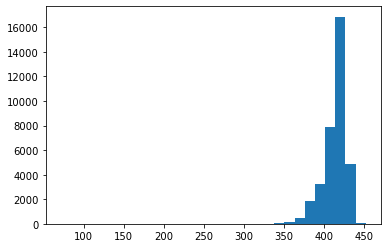

In [3]:
data['length']= data['text'].apply(len)
display(data.head(10))
plt.hist(data['length'], bins= 30)
plt.title('')

In [4]:
# distribution of output classes
data['label'].value_counts(normalize= True)*100

7.0     15.676806
6.0     12.997878
3.0     12.373512
8.0     11.177068
1.0     10.638821
10.0     9.387014
4.0      7.187894
5.0      7.021807
2.0      4.524344
11.0     4.330575
9.0      3.014179
0.0      1.670101
Name: label, dtype: float64

## text normalization

Although data sounds to be clean, but I will do some tests to see if it is the case.

In [5]:
text= data['text'].iloc[0]
# check if all are True
sum([el.isalpha() for el in text]) == len(text)

True

In [6]:
data['quality_check']= data['text'].apply( lambda row:
                                        sum([el.isalpha() for el in row]) == len(row) )
data['quality_check'].value_counts()

True    35513
Name: quality_check, dtype: int64

That just told me the text is completely clean. So we'll try to featurize it.

## featurizing the data

In [7]:
def bow_extractor(corpus, ngrams= (1,1)):
    """
    corpus should be an array of documents. For example list
    """
    vectorizer= CountVectorizer(analyzer='char', min_df= 1, ngram_range= ngrams)
    features= vectorizer.fit_transform(corpus)
    return vectorizer, features

def tfidf_transformer(bow_matrix):
    transformer = TfidfTransformer(norm='l2', smooth_idf=True, use_idf=True)
    tfidf_matrix = transformer.fit_transform(bow_matrix)
    return transformer, tfidf_matrix
    

In [8]:
def prepare_data(train: typing.List[str], 
                 test: typing.List[str],
                 feature_type: str
                 ) -> typing.Tuple[np.array, np.array, typing.List[str]]:
    """
    Gets 
        1. train data: list of documents
        2. test data: list of documents
    returns
        1. train: numpy array
        2. test: numpy array
        3. feature names: list of strings
        
    """
    if feature_type not in {'bow', 'tfidf'}:
        raise ValueError("feature_type can only be 'bow' or 'tfidf'.")
    # first put train and test together
    data= train.copy()
    data.extend(test)
    # get bow features, here bag of letters
    bow_vectorizer, bow_features= bow_extractor(corpus= data,  ngrams= (1,1) )
    # get tfidf features
    tfidf_trans, tfidf_features= tfidf_transformer( bow_features )
    if feature_type=='bow':
        return ( bow_features.todense()[:len(train)],
                 bow_features.todense()[len(train):],
                 bow_vectorizer.get_feature_names() )
    else:
        return ( tfidf_features.todense()[:len(train)],
                 tfidf_features.todense()[len(train):],
                 bow_vectorizer.get_feature_names() )

In [9]:
X_train, X_test, feature_names= prepare_data(train= xtrain['text'].tolist(),
                                            test= xtest['text'].tolist(),
                                            feature_type= 'bow')
df_train= pd.DataFrame(X_train, columns= feature_names)
df_train['label']= ytrain
print(df_train.shape)
display(df_train.head(2))

(32513, 27)


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,label
0,17,0,2,4,25,4,5,34,16,0,16,34,41,10,0,17,15,16,7,23,50,30,30,3,2,5,7
1,12,2,0,1,28,1,8,30,24,2,22,24,30,16,1,14,12,10,14,19,43,39,24,1,5,4,3


## Build a Baseline model

We have a multiclass classification problem. We can try to fit these models:

1. Multinomial Naiive Bayes on bow features
2. XGBoost (tfidf)
3. FNN (tfidf)

#### Multinomial Naiive Bayes

In [14]:
X_train, X_test, feature_names= prepare_data(train= xtrain['text'].tolist(),
                                            test= xtest['text'].tolist(),
                                            feature_type= 'bow')
y_train= ytrain['label'].values

In [16]:
clf= MultinomialNB(alpha= 0)
scores= cross_val_score(estimator=clf, 
                        X=X_train, 
                        y=y_train, 
                        cv= 7, 
                        scoring= 'accuracy', 
                        n_jobs= -1)

In [17]:
scores.mean()

0.3066154519818124

#### XGBoost

In [18]:
class FitXGBoost:
    """
    Fit XGBoost for regression & (multiclass)classification
    """
    
    def __init__(self, X, y, init_params, tuning_params, metric, cv= 5, seed= 42, 
                             problem_type='classification'):
        self.X= X
        self.y= y
        self.init_params= init_params
        self.tuning_params= tuning_params
        self.metric= metric
        self.cv= cv
        self.seed= seed
        self.problem_type= problem_type
        if self.problem_type not in ['regression', 'classification']:
            raise ValueError('accepted values for "problem_type" are either "regression" or "classification."')
    
    def get_initial_ntrees(self) -> int:
        """
        With some initial parameters, we first find the optimum number of trees
        - returns the optimum initial number of trees
        """
        if self.problem_type=='classification':
            # compute class weights
            classes= np.unique(self.y)
            class_weights= list( class_weight.compute_class_weight('balanced', 
                                                                    classes,
                                                                    self.y) )
            class_weights= {k: class_weights[i] for i, k in enumerate(classes)}
            w_array = np.ones(self.y.shape[0], dtype = 'float')
            for i, val in enumerate(self.y):
                w_array[i] = class_weights[val]
        # build dataset special for xgboost 
        self.dtrain = xgb.DMatrix(self.X, label= self.y, weight= w_array )
        
        # find initial number of trees for a set of initial parameters
        print('Finding the initial number of trees with the initial parameters...')
        cv_results = xgb.cv( self.init_params, 
                             self.dtrain,  
                             num_boost_round= 1000, 
                             seed= self.seed, 
                             nfold= self.cv,
                             stratified= (self.problem_type == 'classification'),
                             metrics= {self.metric},   
                             early_stopping_rounds= 50,
                             verbose_eval= 0)
        return len(cv_results)
        
    def XGB_gridsearch(self, 
                       estimator: xgb.XGBModel, 
                       params: typing.Dict[str, typing.Any]
                      )-> GridSearchCV:
        """
        After finding the initial number of trees to start with, we have to adjust other hyper-
        parameters as explained before with gridsearch
        """
        if self.metric=='rmse':
            scoring= 'neg_mean_squared_error'
        elif self.metric == 'merror':
            scoring= 'accuracy'
        else:
            scoring= self.metric            
        # There is not a match between gridsearchcv scoring naming and that of xgboost naming
        grid_search = GridSearchCV(estimator= estimator, 
                                   param_grid = params,
                                   scoring= scoring, 
                                   cv = self.cv, 
                                   n_jobs= -1, 
                                   verbose = 2)
        grid_search.fit(self.X, self.y)
        return grid_search
    ##############################################
    def run(self) -> typing.Tuple[ typing.Dict[str, typing.Any], pd.DataFrame]:
        """
        1. finds the initial number of trees
        2. optimizes hyperparameters based on tuning_params
        3. finds the optimum number of trees with a low rating rate and 
            found hyperparameters
        
        It returns hyperparameters and cv_results
        """
        ntrees= self.get_initial_ntrees()
        # This is a base estimator for grid search
        if self.problem_type =='regression':
            xgb_model= xgb.XGBRegressor(random_state= self.seed )
        elif self.problem_type =='classification':
            xgb_model= xgb.XGBClassifier(random_state= self.seed )
        params= self.init_params
        params['learning_rate']= params['eta']; del(params['eta'])
        params['n_estimators']= ntrees
        # convert values into lists
        for k, v in params.items():
            params[k]= [v]

        tuning_order= [ ['max_depth', 'min_child_weight'], ['gamma'], 
                       [ 'colsample_bytree', 'subsample'], ['reg_lambda'], ['reg_alpha'] ]
        for stage in tuning_order:
            for el in stage:
                params[el]= self.tuning_params[el]

            print('grid-searching for " %s "' %str(stage))
            gs= self.XGB_gridsearch(estimator= xgb_model, params= params )
            updated_params= gs.best_params_
            updated_score= gs.best_score_
            for el in stage:
                params[el]= [ updated_params[el] ]
            print('updated parameters...')
            if self.problem_type=='regression':
                updated_score= math.sqrt(-updated_score)
            print('The current score for metric "%s" is: %0.4f ' %
                                                  ( self.metric, updated_score ) ) 
            print('*'*10)

        print('Found all the hyperparameters for the initial number of trees: ntrees= %d' %ntrees)
        hyperparameters= params
        for k,v in hyperparameters.items():
            hyperparameters[k]= v[0] # delisting

        print('Now we will start the process of learning by the found hyperparameters and by \
considering a low learning rate\n')

        hyperparameters['eta']= 0.01
        del(hyperparameters['learning_rate'], hyperparameters['n_estimators'])

        cv_results = xgb.cv( hyperparameters, 
                         self.dtrain,  
                         num_boost_round= 3000, 
                         seed= self.seed, 
                         nfold= self.cv, 
                         stratified= (self.problem_type == 'classification'),
                         metrics= { self.metric },   
                         early_stopping_rounds= 100)
        print('The optimum number of trees is: %d' %len(cv_results))
        print('train score for metric "%s" is: %0.04f' % (self.metric, cv_results.iloc[-1, 0]))
        print('cv score for metric "%s" is: %0.04f' % (self.metric, cv_results.iloc[-1, 2]))

        # prepare for output
        hyperparameters['learning_rate']= 0.01; del(hyperparameters['eta'])
        hyperparameters['n_estimators']= len(cv_results)
        print('The best hyperparameters are: \n')
        print(hyperparameters)
        return hyperparameters, cv_results

In [ ]:
init_params= {
                'eta':0.2,
                'max_depth': 8,
                'min_child_weight': 3,
                'colsample_bytree': 0.8,
                'subsample': 0.8,
                'gamma': 0, 
                'reg_lambda': 1,
                'reg_alpha': 0,
                'objective':'multi:softmax',
                'num_class': len(ytrain['label'].unique())}
tuning_params= {
                'learning_rate': [0.2],
                'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                'min_child_weight': [1, 2, 3, 4, 5],
                'colsample_bytree': [i/10.0 for i in range(4,10)],
                'subsample': [i/10.0 for i in range(6,10)],
                'gamma': [i/10.0 for i in range(0,5)], 
                'reg_lambda': [1e-5, 1e-2, 0.1, 1, 10, 100],
                'reg_alpha': [1e-5, 1e-2, 0.1, 1, 10, 100],
                'objective': ['multi:softmax'],
                'num_class': [len(ytrain['label'].unique())]}

fit_xgboost= FitXGBoost(X= X_train,
                        y= y_train,
                        init_params= init_params.copy(),
                        tuning_params= tuning_params.copy(),
                        metric= 'merror',
                        cv= 5,
                        seed= seed,
                        problem_type= 'classification')

hyperparameters, cv_results= fit_xgboost.run()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11], y=[ 7  3  8 ... 10  6  3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Finding the initial number of trees with the initial parameters...


In [ ]:
# get tfidf data
X_train, X_test, feature_names= prepare_data(train= xtrain['text'].tolist(),
                                            test= xtest['text'].tolist(),
                                            feature_type= 'tfidf')
y_train= ytrain['label'].values

xgb_clf= xgb.XGBClassifier(**hyperparameters, 
                       random_state= seed, 
                       verbosity= 1 )

# get weights
classes= np.unique(y_train)
class_weights= list( class_weight.compute_class_weight('balanced', 
                                                        classes,
                                                        y_train) )
class_weights= {k: class_weights[i] for i, k in enumerate(classes)}
w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val]

# fit the model    
xgb_clf.fit(X_train, y_train, sample_weight= w_array)
y_train_predicted= xgb_clf.predict(X_train)

#### Feedforward Neural Network

In [ ]:
X_train, X_test, feature_names= prepare_data(train= xtrain['text'].tolist(),
                                            test= xtest['text'].tolist(),
                                            feature_type= 'tfidf')
y_train= ytrain['label']
# needed for multiclass classification 
y_train= utils.to_categorical(y_train)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

In [ ]:
def NN_model():
    kernel= 'normal'
    model= Sequential(name= 'sequential')
    #### layer 1
    model.add(Dense(100, 
                    input_dim= 26, 
                    kernel_initializer= kernel, 
                    activation= 'relu', 
                    name= 'dense_1'))
    model.add(Dropout(0.4, name= 'dropout_1'))
    #### layer 2
    model.add(Dense(50, 
                    kernel_initializer= kernel, 
                    activation= 'relu', 
                    name= 'dense_2'))
    model.add(Dropout(0.4, name= 'dropout_2'))
    #### layer 3
    model.add(Dense(25, 
                    kernel_initializer= kernel, 
                    activation= 'relu', 
                    name= 'dense_3'))
    model.add(Dropout(0.4, name= 'dropout_3'))
    #### layer 4
    model.add(Dense(12, 
                    kernel_initializer= kernel, 
                    activation= 'softmax', 
                    name= 'dense_4'))
    model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    plot_model(model, show_shapes= True, to_file= 'FNN.png')
    model.summary()
    return model

In [ ]:
def report_model(history: typing.Dict) -> None:
    plt.figure(figsize= (12, 4))
    plt.ylim(0, 1)
    plt.plot(history['accuracy'], )
    #plt.plot(history['val_accuracy'], marker= 'o', markersize= 4)
    plt.title('model accuacy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.show()
    plt.close()
    
    plt.figure(figsize= (12, 4))
    plt.plot(history['loss'], )
    #plt.plot(history['val_loss'], marker= 'o', markersize= 4)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    plt.close()

In [ ]:
model= KerasClassifier(build_fn= NN_model,
                        epochs= 100, 
                        batch_size= 128)
scores= cross_val_score(estimator= model, 
                        X= X_train, 
                        y= y_train, 
                        cv= 5, 
                        n_jobs= -1)

In [ ]:
scores

In [ ]:
print(scores.mean())